In [80]:
# Processamentos dos dados filtrados pela oceanpact
# - dados que o tales passou com todos os filtros de kalman e etc.
# Henrique Pereira
# ~ AtmosMarine ~

In [81]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import ipympl
from importlib import reload

sys.path.append('../ocean-wave')
import waveproc
reload(waveproc);

In [82]:
pth = '/mnt/c/Users/henri/OneDrive - atmosmarine.com/boia_oceanpact/dados/teste_copacabana_20240929/GX4/'

In [83]:
df = pd.read_csv(pth + 'dados_filtrados.csv', index_col='Time')

In [84]:
df.rename({'Filtered_Data': 'n1'}, axis=1, inplace=True)
df.head(2)

,n1
Time,
0.000000,-0.038568
0.012576,-0.038554


In [85]:
# retira dados zerados

df = df.loc[3000:]

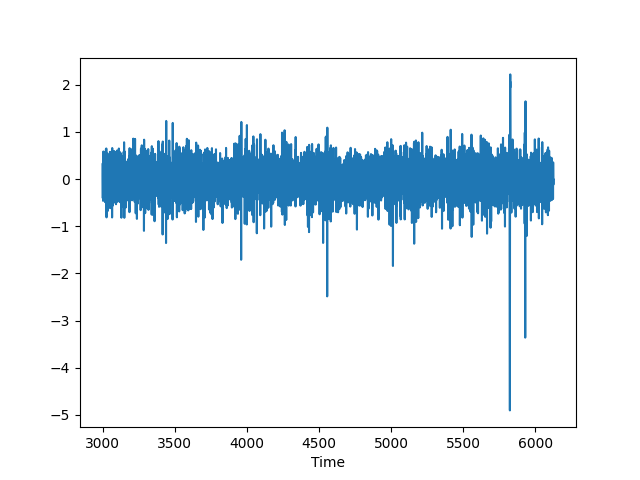

In [86]:
plt.close('all')

df.n1.plot()
plt.show()

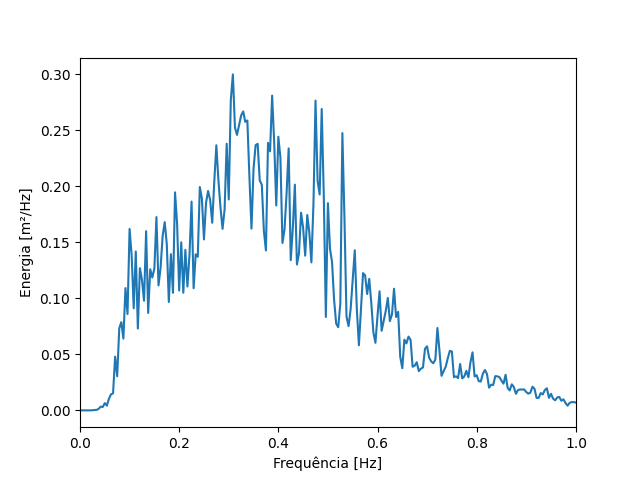

[1.26252521] [3.24436405]


In [87]:
# %matplotlib inline
%matplotlib widget

df1 = df.copy()
# df1 = df.loc[4000:5024]

Fs = 1 / (df1.index[3] - df1.index[2])
NFFT = int(len(df1) / 12)

cc, pp, tt = waveproc.waveproc(t=df1.index.values,
                               s1=df1.n1.values,
                               s2=[],
                               s3=[],
                               Fs=Fs, NFFT=NFFT)

plt.close('all')

fig, ax = plt.subplots()
cc.c11.plot(ax=ax)
ax.set_xlim(0, 1)
ax.set_xlabel('Frequência [Hz]')
ax.set_ylabel('Energia [m²/Hz]')
plt.show()

print (pp.hm0.values, pp.tp.values)

In [56]:
pp.tp

0    3.273858
Name: tp, dtype: float64

No such comm: b4bf7b8e067b4a33907bcbeadc2cd236


In [57]:
pp.hm0

0    1.281731
Name: hm0, dtype: float64

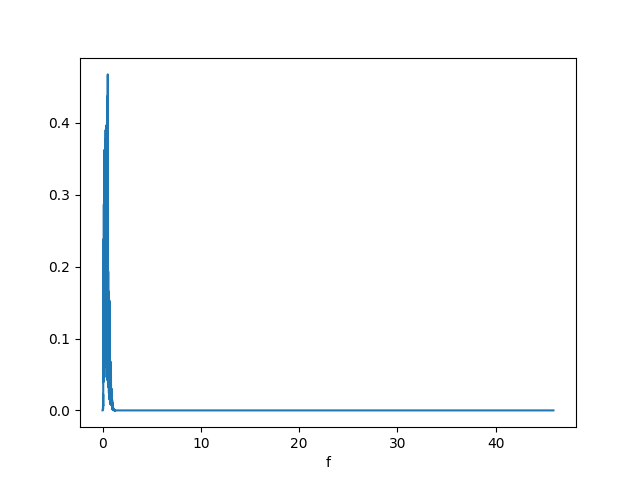